In [29]:
import numpy as np
from numpy import ones
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import *
from sklearn.preprocessing import StandardScaler
from numpy import genfromtxt
from numpy import mean
from numpy.random import randn
from scipy.stats import gaussian_kde
from scipy.integrate import quad
import scipy.stats as stats
from scipy.stats import expon
from scipy.stats import norm
import pandas as pd
import sys
np.set_printoptions(precision=4)
np.set_printoptions(threshold=30)
np.set_printoptions(linewidth=300)
np.set_printoptions(suppress=True)
np.set_printoptions(threshold=sys.maxsize)

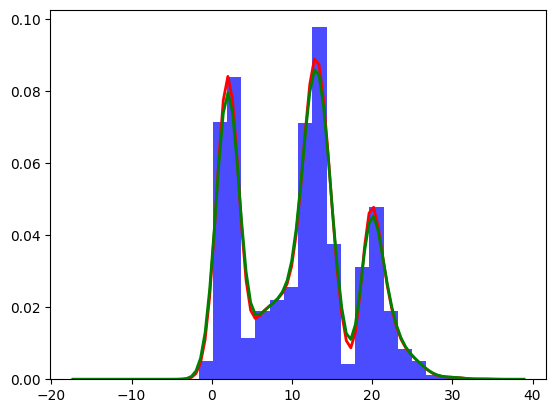

In [48]:
X = genfromtxt('parental_anxiety_vs_kids_age.csv', delimiter=',')

n, bins, patches = plt.hist(X,20, facecolor = 'blue', density = True, alpha= 0.7)
sigma = 1
n = len(X)


def p(x): # This is the kde p(x) distribution
	def gaussian(μ, sigma, x): return np.exp(-0.5 * ((x - μ) / sigma)**2) / (sigma * np.sqrt(2*np.pi))
	px = 0
	for xi in X:
		px += gaussian(xi, sigma, x)
	return px/n
#KDE
x = np.linspace(np.mean(X)-4*np.std(X), np.mean(X)+4*np.std(X), 100)
y = p(x)
z = gaussian_kde(X)
plt.plot(x,y, linewidth=2, color='r')
plt.plot(x,z(x), linewidth=2, color='g')
plt.show()

In [49]:
def eigh_sort(Q):
  [D,V] = np.linalg.eigh(Q)
  idx = D.argsort()[::-1]
  D = D[idx]
  V = V[:,idx]
  return [D,V]
def centering_matrix(X):
  n = X.shape[0]
  return np.identity(n) - 1/n*np.ones_like(np.identity(n))



In [ ]:
def k(x_i, x_j, gamma):
  return np.dot(x_i, x_j)
def Km(X, gamma):
  n = X.shape[0]
  K_matrix = np.zeros((n, n))
  for i in range(n):
    for j in range(n):
      K_matrix[i,j] = k(X[i], X[j], gamma)
  return K_matrix
def predictor(X_hat, X, alpha, gamma):
  n = X.shape[0]
  n2 = X_hat.shape[0]
  Kmatrix = np.zeros((n2, n))
  for i in range(n2):
    for j in range(n):
      Kmatrix[i,j] = k(X_hat[i], X[j], gamma)
  return np.dot(Kmatrix, alpha)

In [ ]:
gamma = 1
K = Km(X, gamma)
lambda_reg = 1e-3
alpha = np.dot(np.linalg.inv(K + lambda_reg * np.eye(n)), y)

y_hat = predictor(X[0:20, :], X, alpha, y)
comparison = np.hstack((y_hat, y[0:20, :]))
print(comparison)

# Scaling input data and target values
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)

# Regularization parameter lambda
lambda_reg = 1e-3

# Compute Kernel Matrix with scaled data using the linear kernel
K = Km(X_scaled, gamma)

# Solve for alpha using ridge regression
alpha = np.dot(np.linalg.inv(K + lambda_reg * np.eye(n)), y_scaled)

# Make predictions on the first 20 points
y_hat_scaled = predictor(X_scaled[0:20, :], X_scaled, alpha, gamma)

# Inverse transform predictions to original scale
y_hat = scaler_y.inverse_transform(y_hat_scaled)

# Compare predicted vs actual values
comparison = np.hstack((y_hat, y[0:20, :]))
print(comparison)

ValueError: shapes (10001,10001) and (100,) not aligned: 10001 (dim 1) != 100 (dim 0)